A notebook for describing and demonstrating the sampling of the example spectral library with the example instrument, and the production of a set of visualisations of the sampled library, and some statistical properties of this.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The Spectral Parameters Toolkit uses publicly available reflectance spectra of materials, and processes these with the expected spectral response of a given instrument, to give a prediction of the reflectance values that would be observed by the instrument when imaging the given materials.

In this notebook we describe and demonstrate how to sample the previously constructed example spectral library with the previously constructed sample instrument, using the ```sptk.observation``` class. 

We will show how the class can be used to produce plots of the sampled library (sometimes called 'resampled'), and compute the reconstruction error, by comparing the 're'-sampled spectrum to the high-resolution spectrum for each entry. 

We will demonstrate the class methods that can be used to compute the inter-band correlations of the sampled space, and the principal components and linear discriminants across all bands, to give insight to how the information contained in the spectral library is represented in the instrument sampled space.

1. Load example spectral library
2. Load example instrument
3. Sample library with instrument
4. Plot sampled library
5. Export sampled library
6. Compute RMSE of library
7. Compute Statistics

# Loading the Example Spectral Library

First we import the MaterialCollection class:

In [2]:
from sptk.material_collection import MaterialCollection

Then we set the project name, and go about loading the object from memory:

In [3]:
project_name = 'sptk_example'
MATERIAL_SET = {
    'A': [('basalt', '*'),
            ('olivine', '*')],
    'B': [('hematite', '*')]}
spectral_library = 'example_spectral_library'
matcol = MaterialCollection(MATERIAL_SET, spectral_library, project_name, load_existing=True, plot_profiles=False)

Loading existing sptk_example MaterialCollection DF
Exporting the Material Collection to CSV and Pickle formats...


# Loading the Example Instrument

Now we load the instrument:

In [4]:
from sptk.instrument import Instrument

In [5]:
inst = Instrument(
            name = 'example_instrument',
            project_name = 'sptk_example',
            load_existing=True)

Building Instrument...
Loading existing DataFrame for 'example_instrument'...


# Sampling the Library with the Instrument

Now we take the library, and sample it with the instrument, using the Observation class:

In [6]:
from sptk.observation import Observation

In [7]:
obs = Observation(
        material_collection=matcol,
        instrument=inst,
        load_existing=False,
        plot_profiles=False,
        export_df=True)

Building new Observation DataFrame                                                  for 'sptk_example'...
Sampling the Material Collection with the Instrument...
Sampling complete.
Exporting the Observation Pickle format...
Observation export complete.


# Plotting the Sampled Library

Plotting the profiles of the sampled library qualitatively shows the resolution to which the instrument captures the spectral profiles.

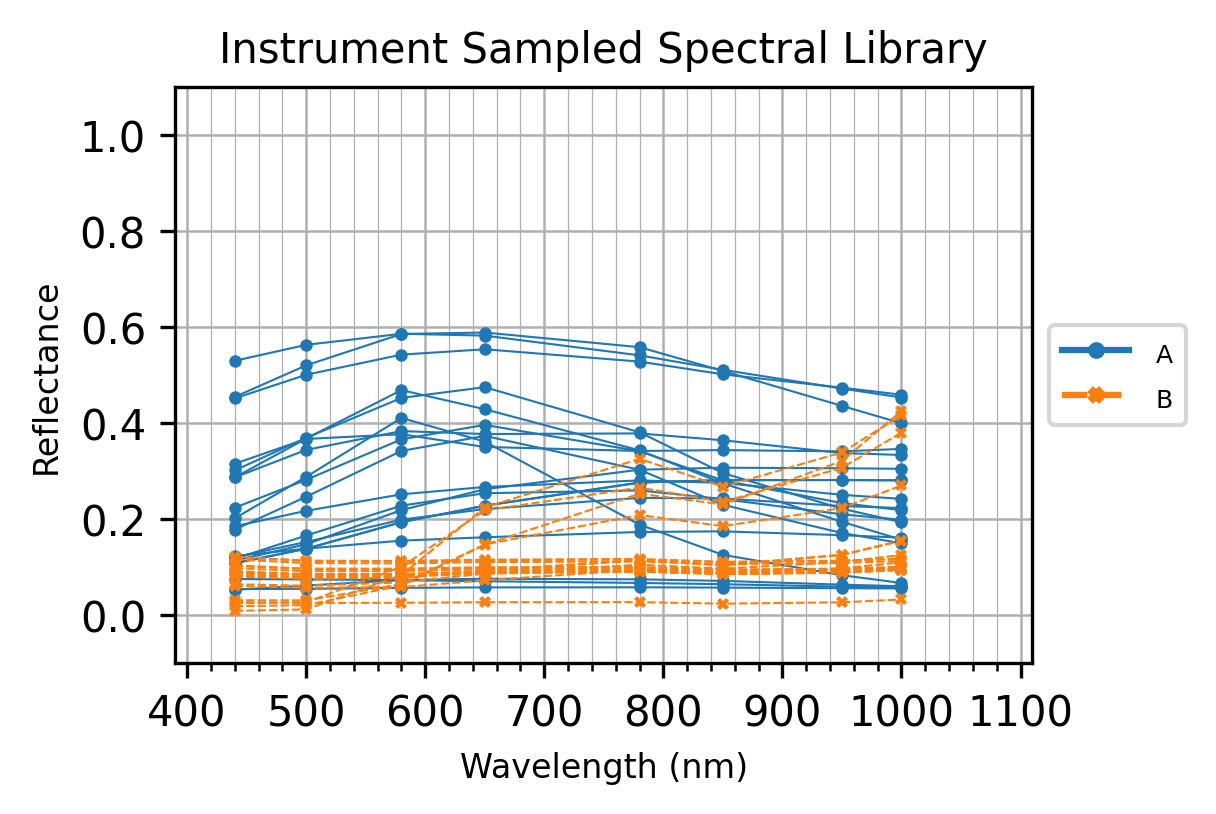

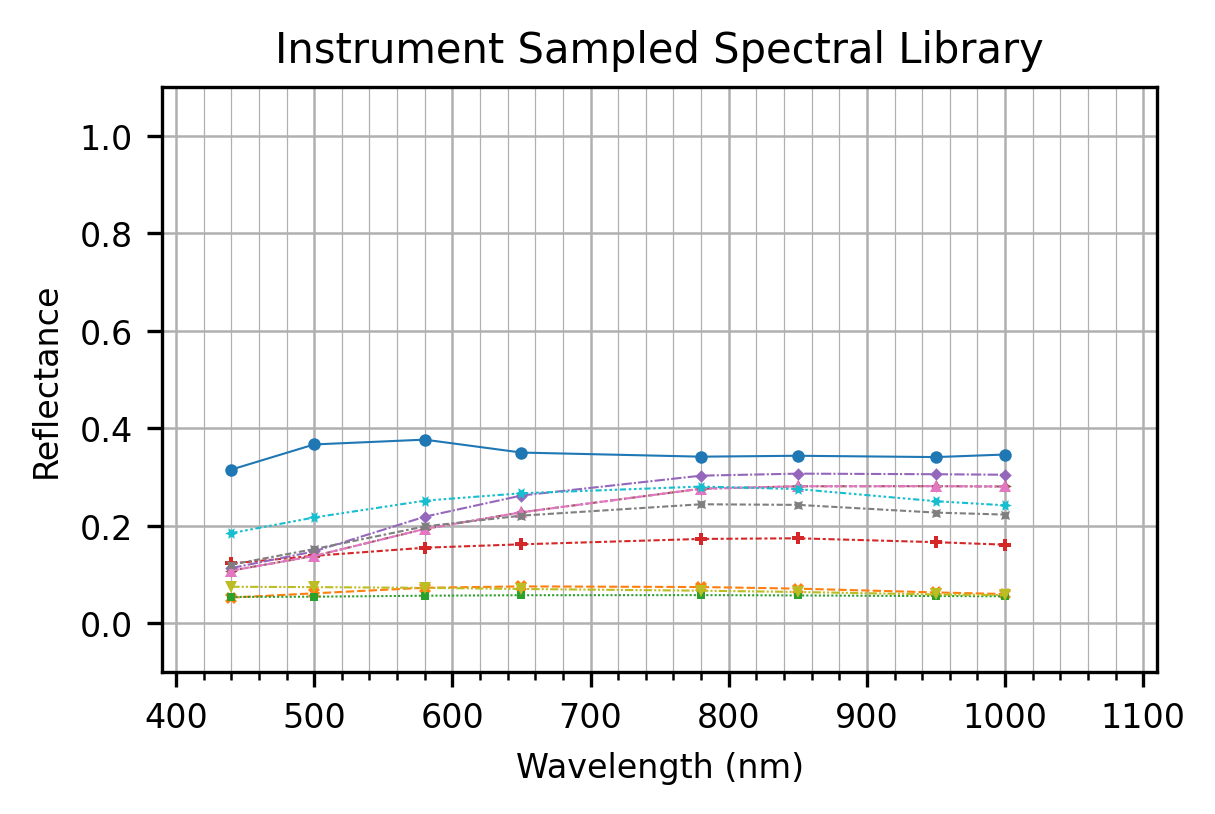

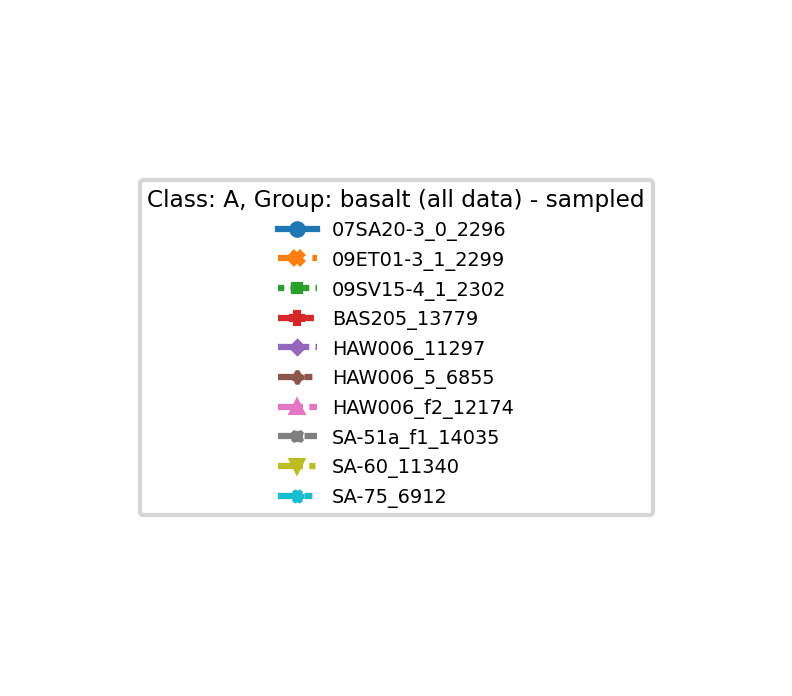

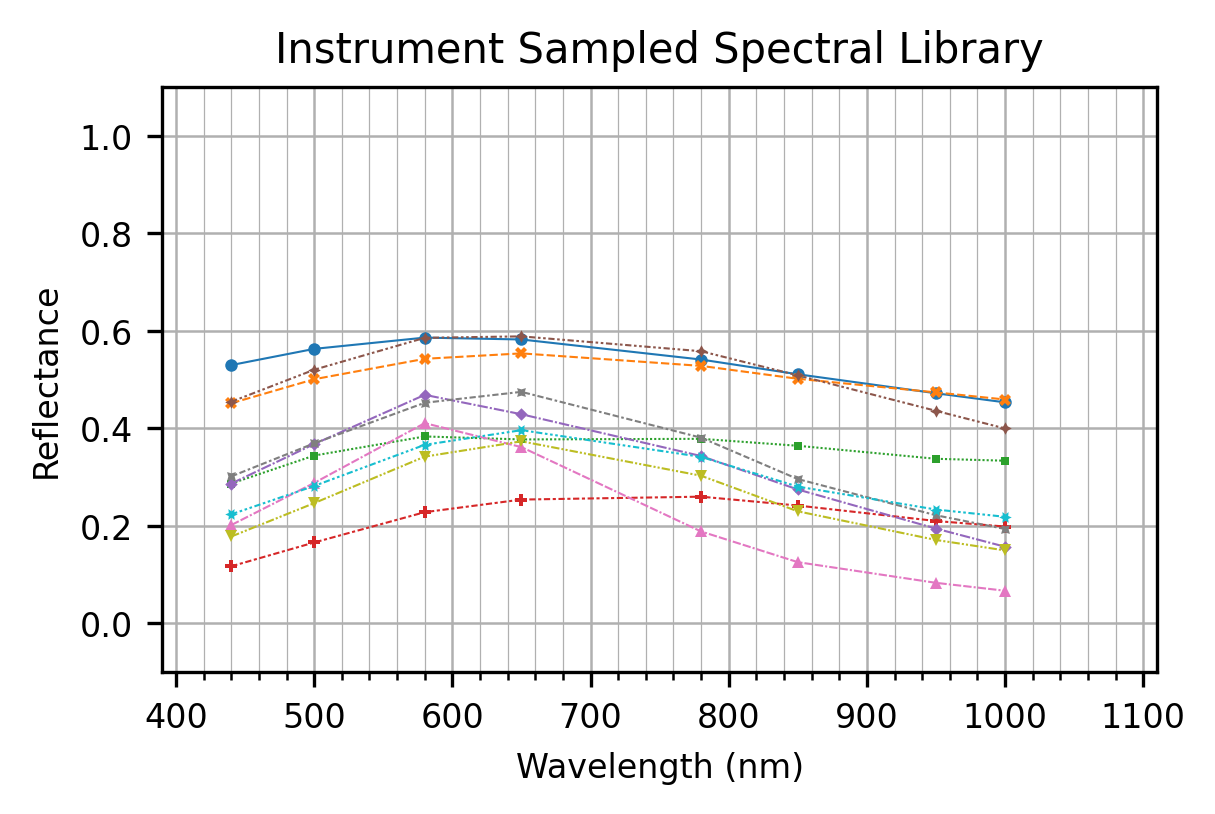

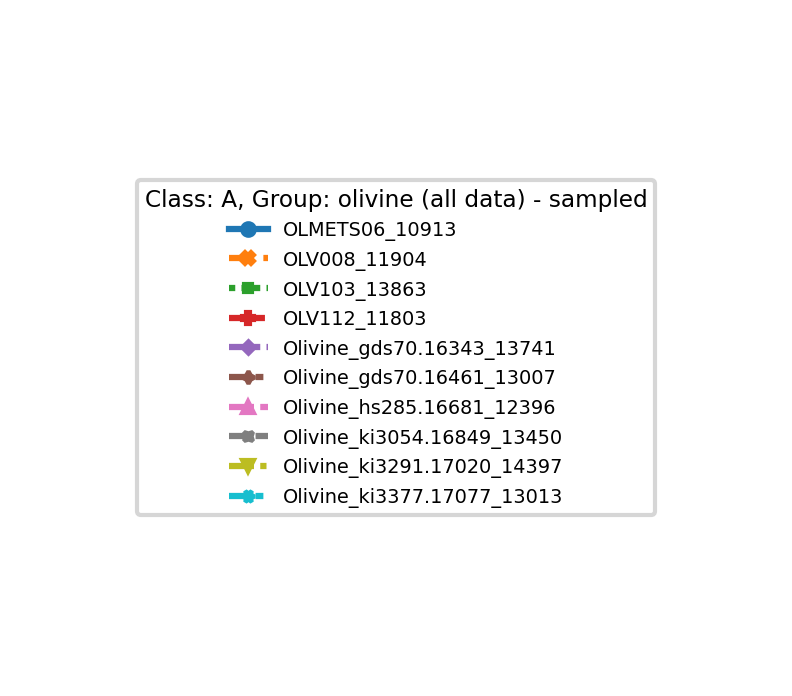

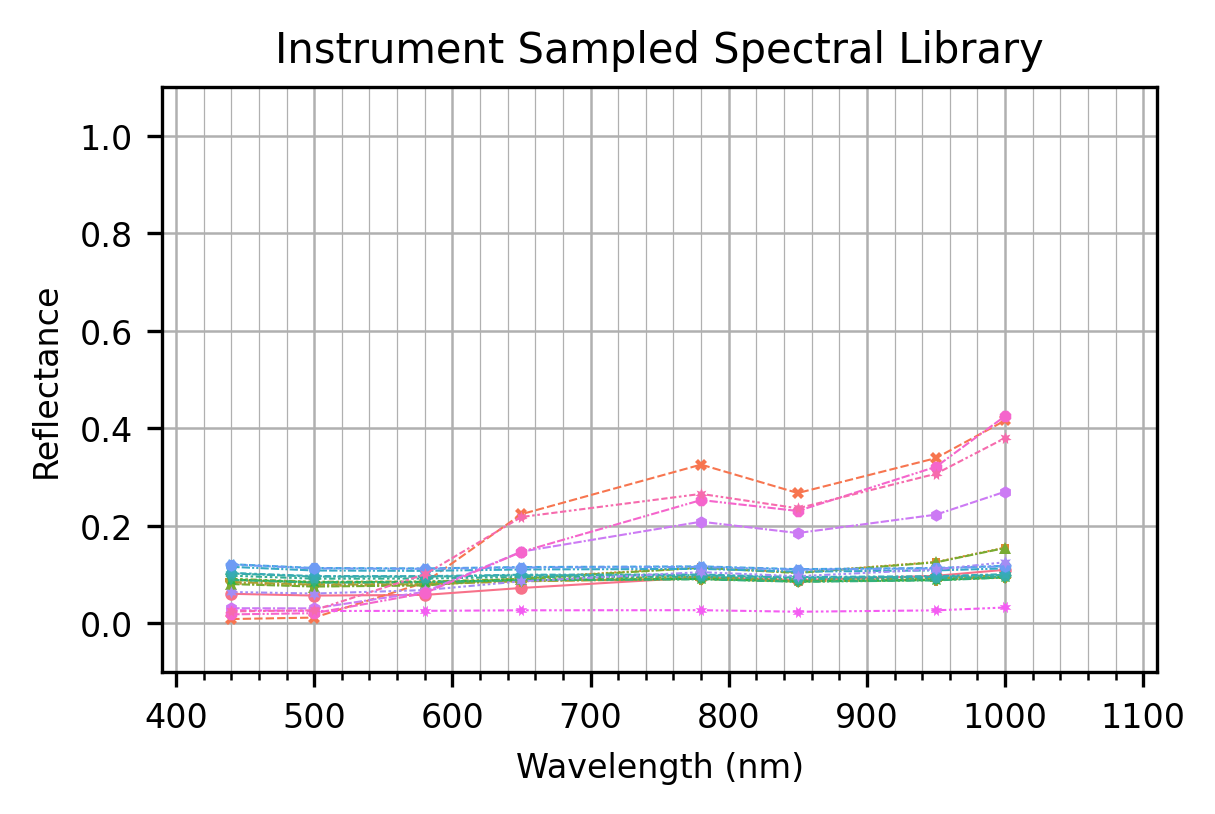

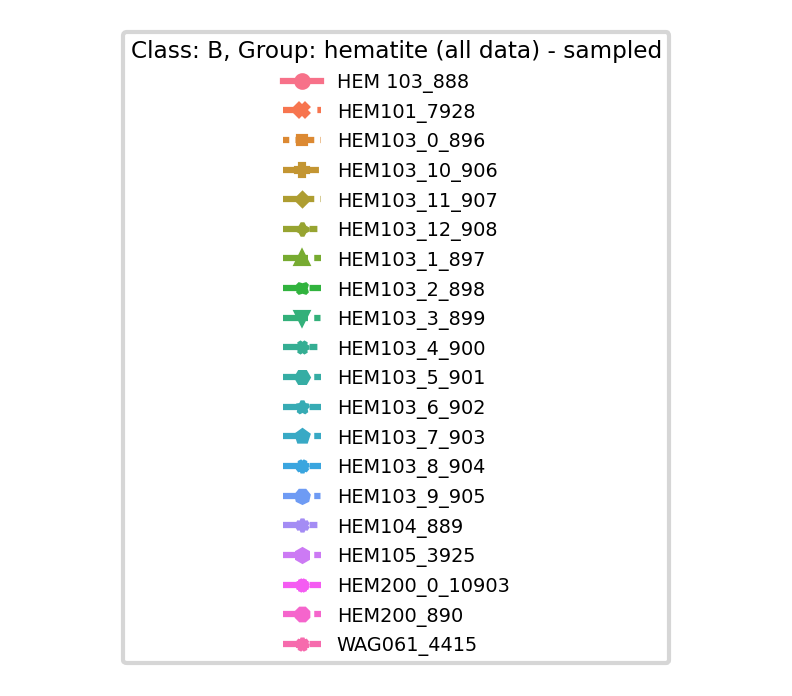

In [8]:
obs.plot_profiles()

# Exporting the Observation

By default, the sampled library is exported to a csv file, giving the metadata and reflectance of each channel for each material entry. This data can then be accessed for the computation of the spectral parameters on the library, and further analysis performed using sptk.

# Computing the RMSE

For greater insight to the degree to which the given instrument captures the spectral profiles of the materials of the library, we can compute the RMSE between the sampled library, linearly interpolated up to the resolution of the high resolution spectral library.

In [9]:
rmse = obs.compute_rmse()

In [10]:
rmse_df = obs.get_rmse_df(rmse)

In [11]:
rmse_df

,Category,Sample ID,Mineral Name,Sample Description,Date Added,Viewing Geometry,Other Information,Formula,Composition,Resolution,Grain Size,Locality,Database of Origin,RMSE
Data ID,,,,,,,,,,,,,,
07SA20-3_0_2296,A,07SA20-3_0,basalt,Basalt,2022-04-27 19:57:39.168961,I30e0,NaN,NaN,NaN,2@350-7@2500nm,<90um,NaN,University of Winnipeg Spectrophotometer Facility,0.006530
09ET01-3_1_2299,A,09ET01-3_1,basalt,Basalt,2022-04-27 19:57:39.285612,I30e0,NaN,NaN,NaN,2@350-7@2500nm,90-1000um,NaN,University of Winnipeg Spectrophotometer Facility,0.000768
09SV15-4_1_2302,A,09SV15-4_1,basalt,Basalt,2022-04-27 19:57:39.430202,I30e0,NaN,NaN,NaN,2@350-7@2500nm,90-1000um,NaN,University of Winnipeg Spectrophotometer Facility,0.000156
BAS205_13779,A,BAS205,basalt,Basalts and Igneous Samples - RELAB plus Nicol...,2022-04-27 19:58:13.215782,30/0/30,SA-73,NaN,NaN,5/ 0.6-129 nm,<45um,Atkinson,University of Winnipeg Spectrophotometer Facility,0.001170
HAW006_11297,A,HAW006,basalt,Basalts and Igneous Samples - ASD Spectra (PSF),2022-04-27 19:59:54.305781,I30/ e0,NaN,NaN,NaN,2@350-7@2500nm,whole rock,Kilauea Caldera,University of Winnipeg Spectrophotometer Facility,0.003190
HAW006_5_6855,A,HAW006_5,basalt,3 outside,2022-04-27 19:59:54.468208,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,Exterior surface,NaN,University of Winnipeg Spectrophotometer Facility,0.003213
HAW006_f2_12174,A,HAW006_f2,basalt,Basalts and Igneous Samples - ASD Spectra (PSF),2022-04-27 19:59:54.631586,I30/ e0,NaN,NaN,NaN,2@350-7@2500nm,Exterior surface,Kilauea Caldera,University of Winnipeg Spectrophotometer Facility,0.003213
SA-51a_f1_14035,A,SA-51a_f1,basalt,Basalts and Igneous Samples - ASD Spectra (PSF),2022-04-27 20:03:25.479400,I=30/ e=0,NaN,NaN,Colombia River Basalt Group,2@350-7@2500nm,<45um,Wallowa County Oregon,University of Winnipeg Spectrophotometer Facility,0.002360
SA-60_11340,A,SA-60,basalt,Basalts and Igneous Samples - ASD Spectra (PSF),2022-04-27 20:03:25.747372,I30/ e0,NaN,NaN,Colombia River Basalt Group,2@350-7@2500nm,Whole rock surface,NaN,University of Winnipeg Spectrophotometer Facility,0.000255


# Exporting the RMSE Data

We can append the RMSE data to the main observation dataframe, and export this to give a new observation.csv file.

In [12]:
obs.export_main_df()

Exporting the Observation Pickle format...
Observation export complete.


# Produce plots of RMSE and Grain Size Distributions

Here we plot the RMSE values for each entry to the spectral library, and illustrate patterns according to the mineral type, class, and grain size. Note, the grain size visualisation component requires improvements in the grouping of different grain size labels.

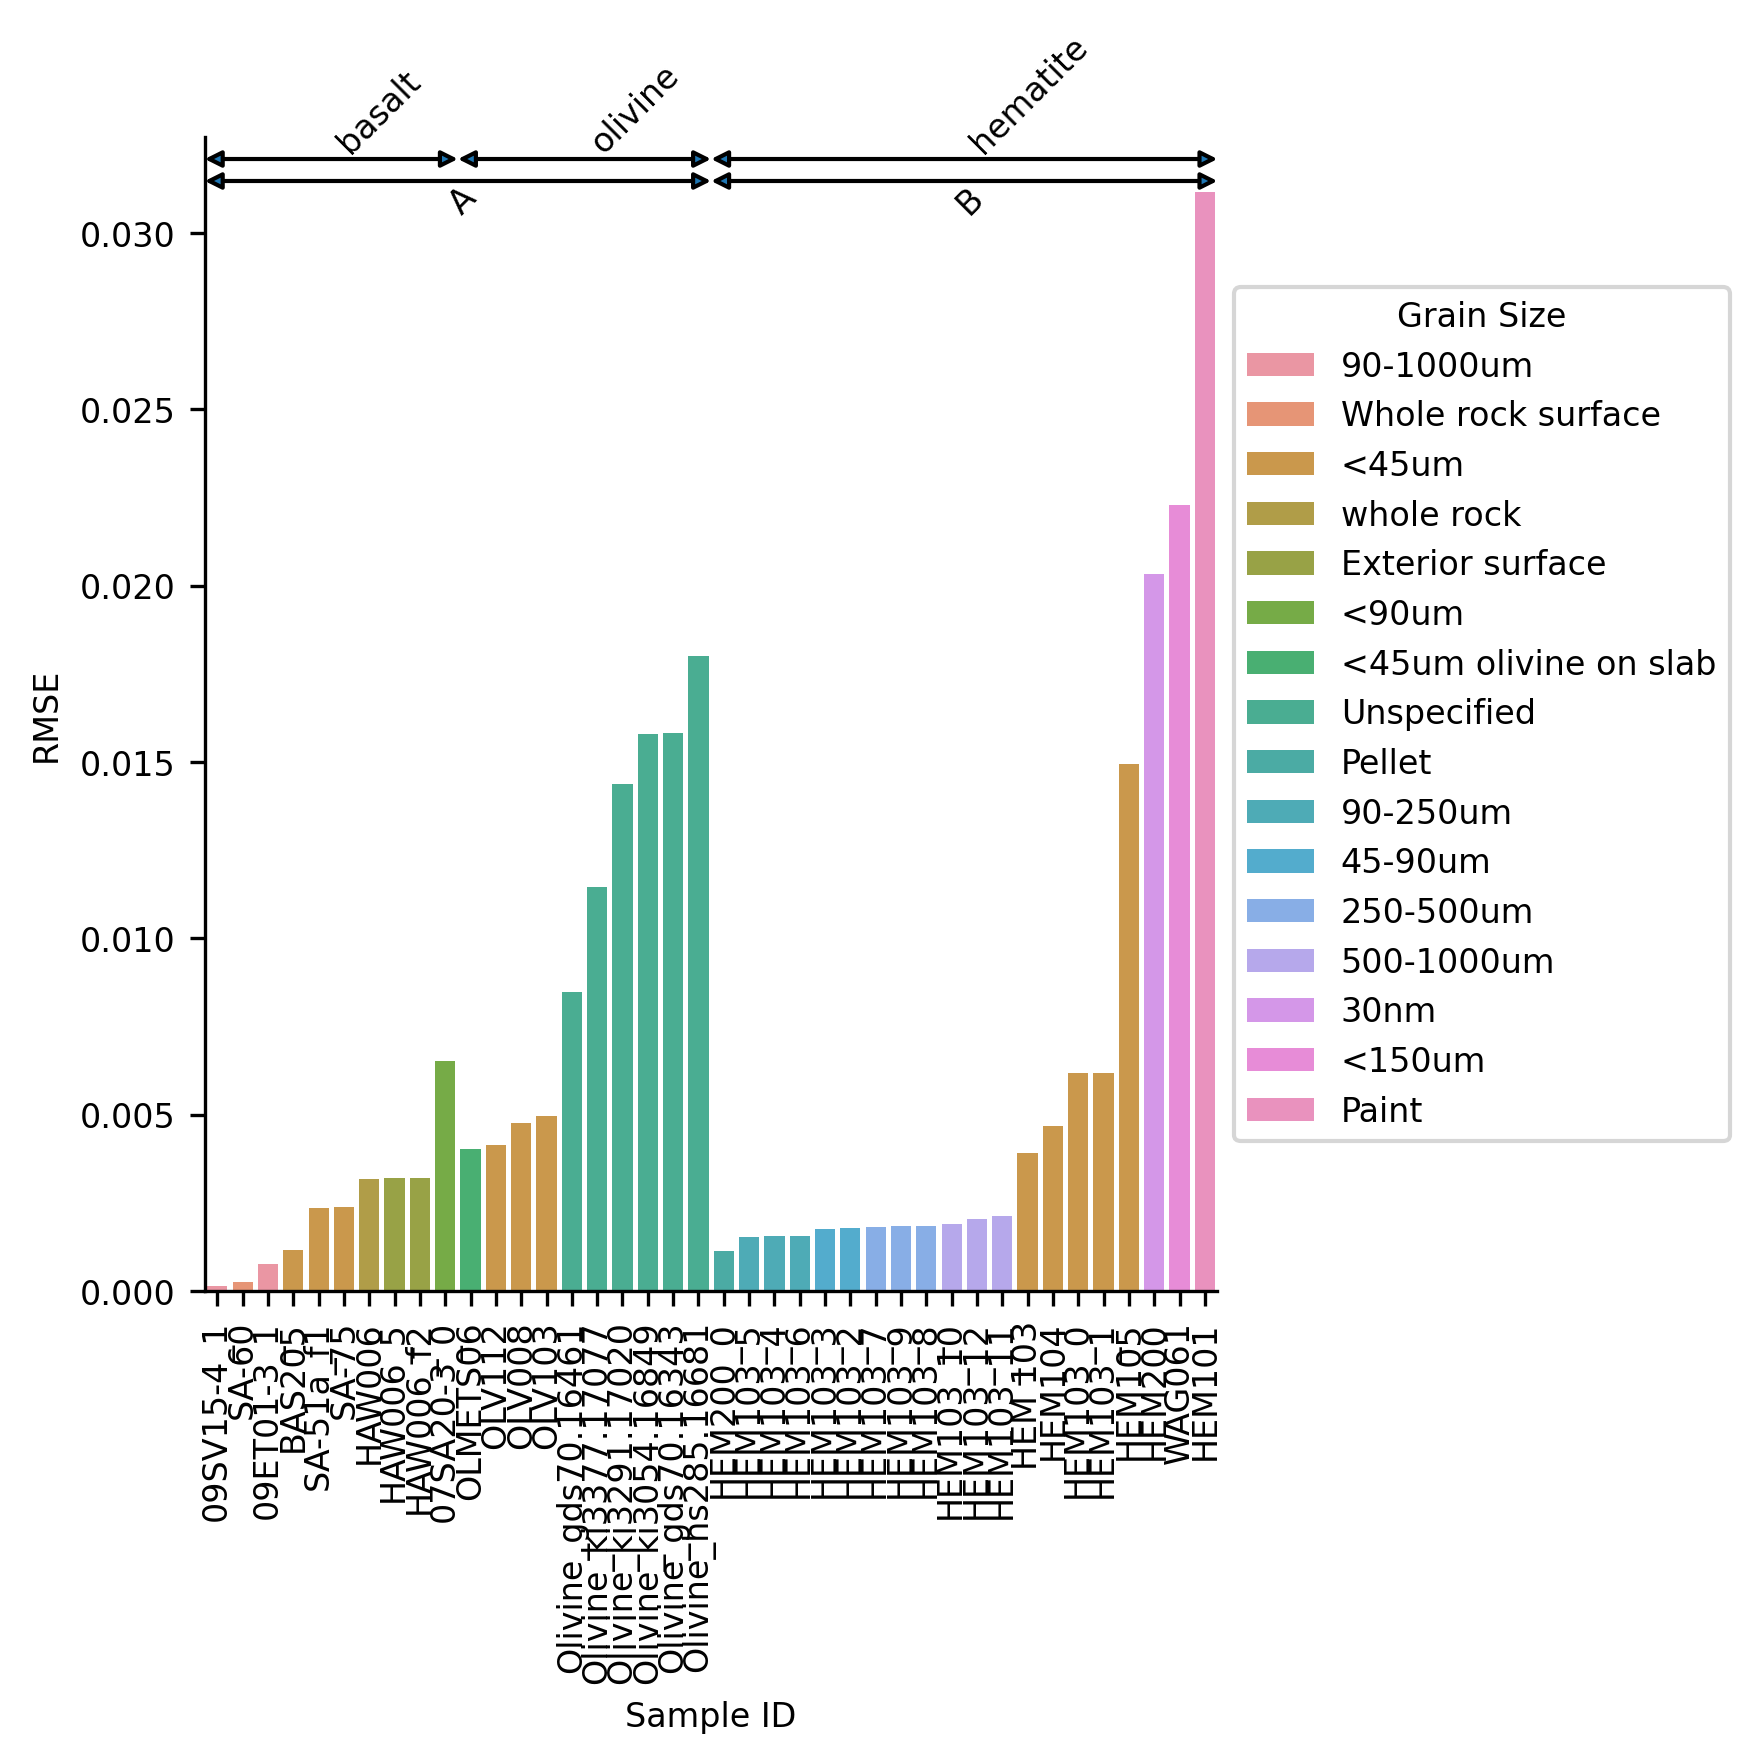

In [13]:
obs.plot_rmse(rmse_df)

# Statistical Trends between Channels

We can also investigate the ability of an instrument to sample the spectral library by looking at statistical properties of the dataset in the channel-sampled space.

Using the ```sptk.observation.statistics``` method, we compute and visualise the correlations between channels across the dataset, how the data can be represented in principal components - linear combinations of the channels that maximise the variance across the dataset, and linear discriminants - linear combinations of the channels that maximises the separation between the labelled classes whilst minimising the variance within the classes.

Performing statistical analyses over all channels...
Computing channel correlations...
Computing and plotting band principal components...
Computing and plotting band linear discriminants...


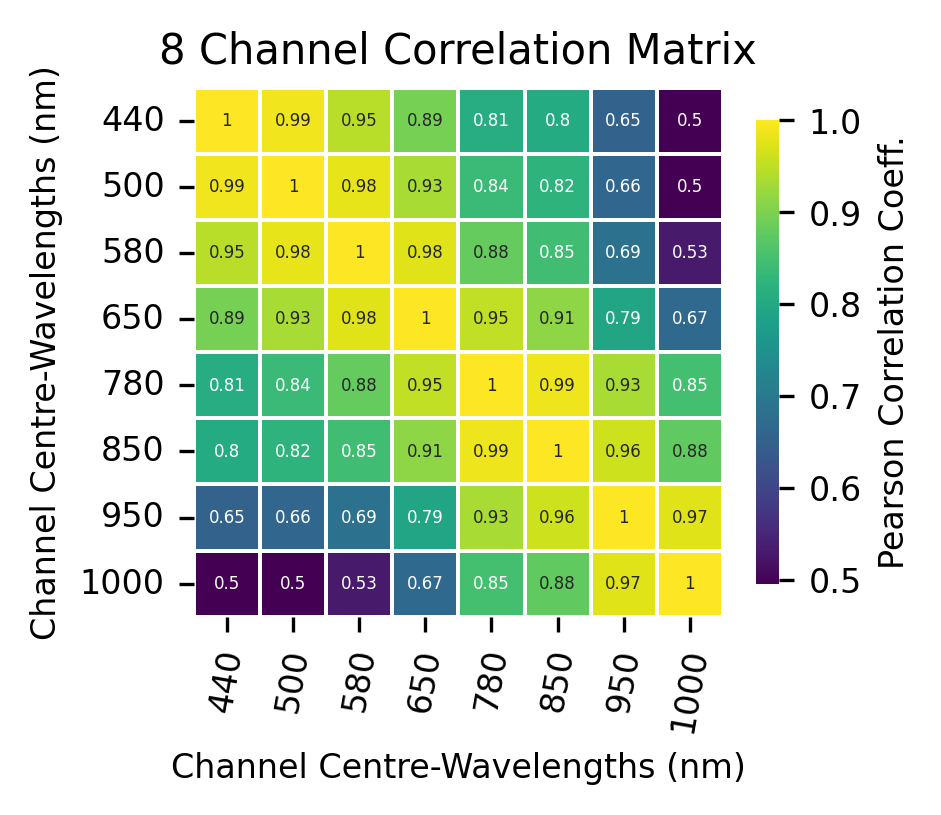

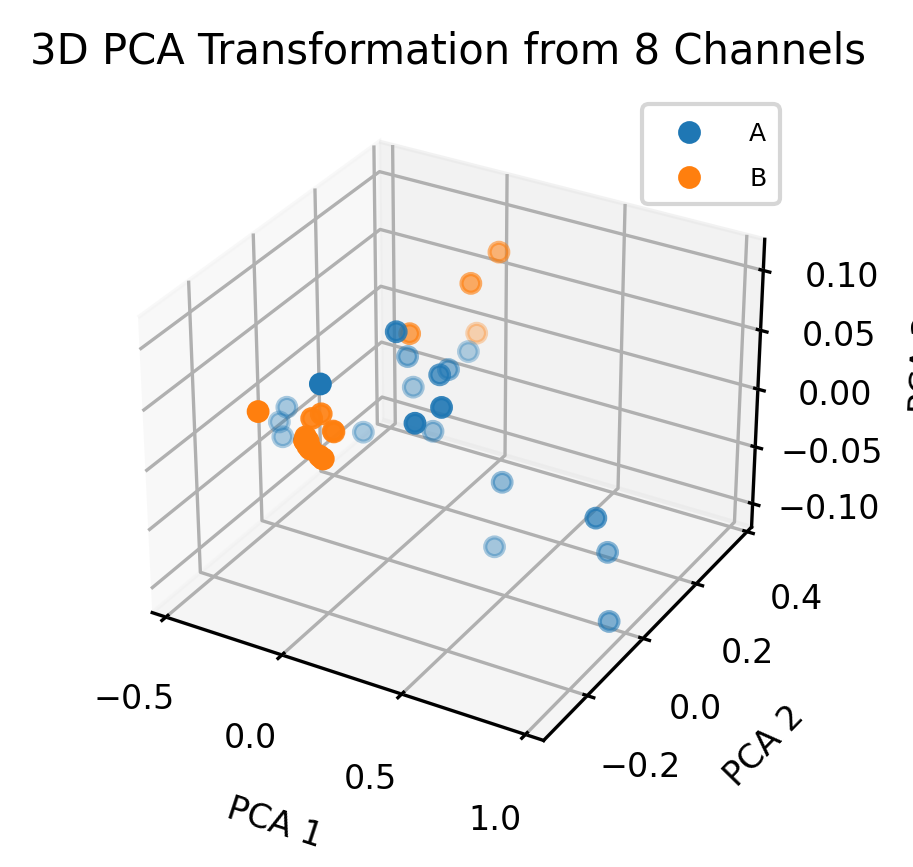

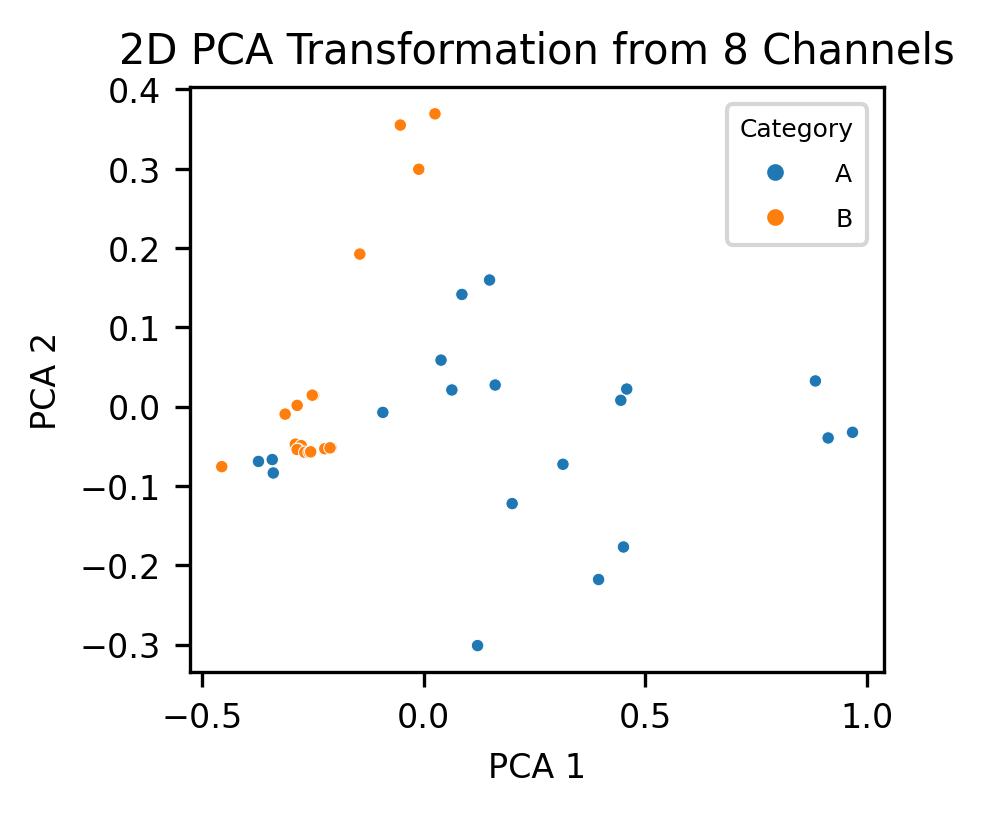

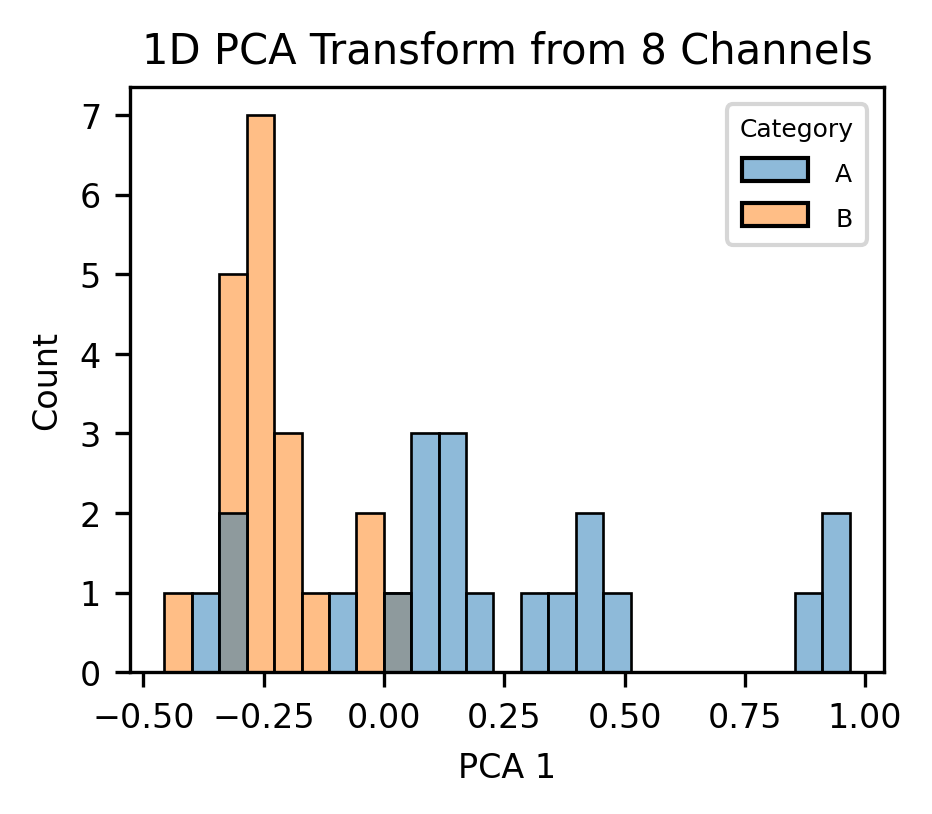

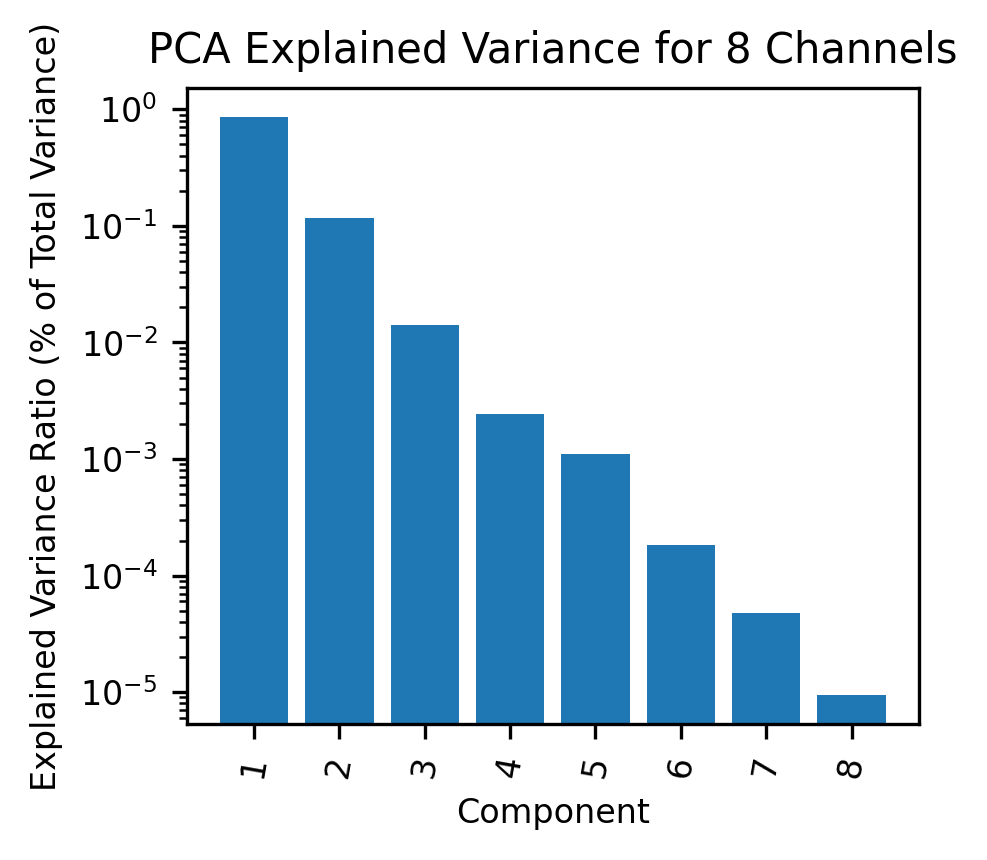

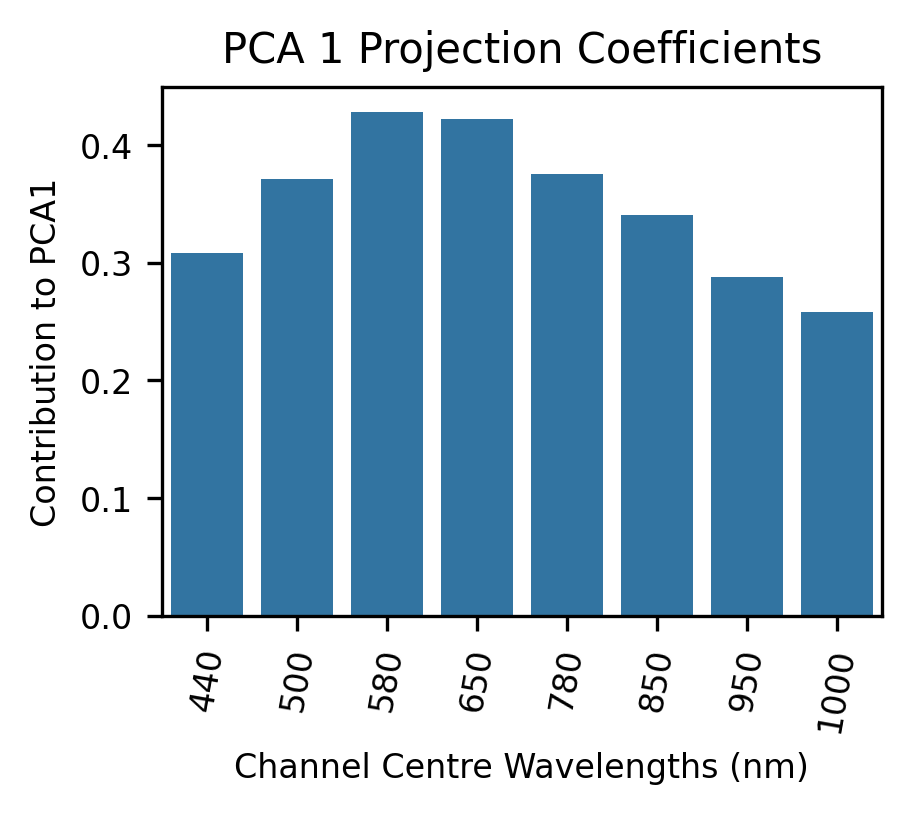

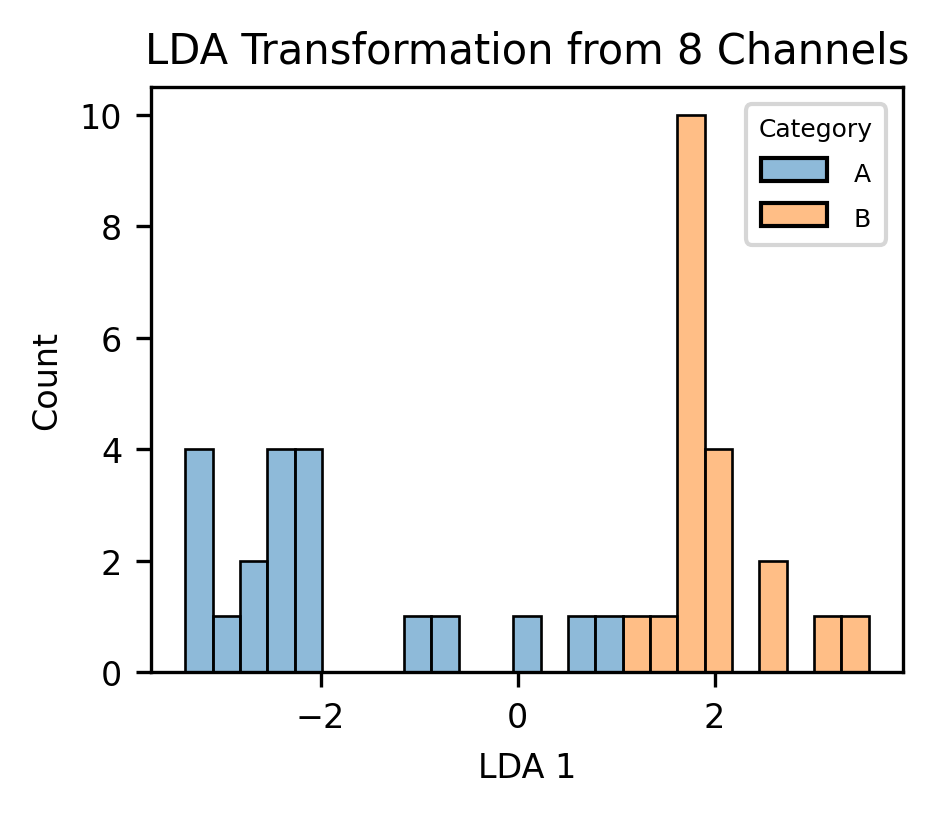

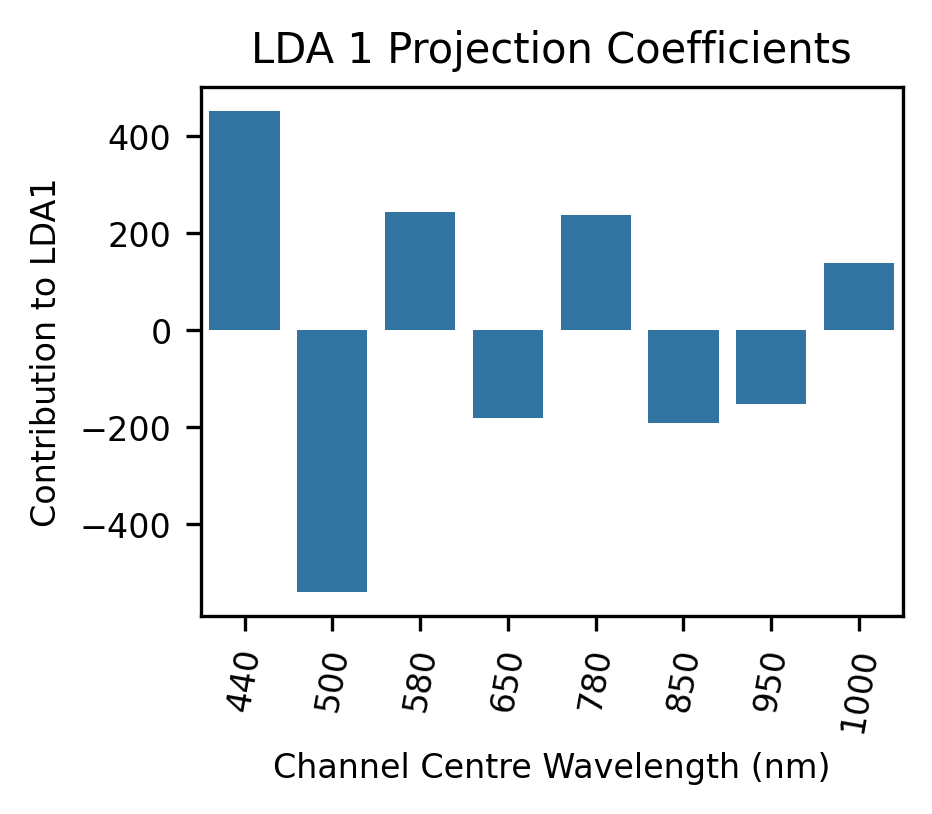

In [14]:
obs.statistics()

These plots have all been exported to the 'sptk_example/observation/statistics/' directory.

All data required for further processing of the resampled spectral library are contained in the 'sptk_example/observation' directory, where it can be accessed to compute spectral parameters on the dataset, and perform the Supervised Spectral Parameter Learning method described in the accompanying paper.